In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

df = pd.read_csv('../data/processed/cangas_IU.csv')

# Convertir fechas a tipo de dato numérico
df['fecha'] = pd.to_datetime(df['fecha'])
df['fecha'] = df['fecha'].map(pd.Timestamp.toordinal)

# Separar características y etiquetas
X = df[['fecha', 'UI']].values
y = df['abierto/cerrado'].values

# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape los datos para LSTM
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, 2)))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=4)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión: {accuracy * 100:.2f}%")

# Hacer predicciones
predicciones = model.predict(X_test)


Epoch 1/50


C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 734us/step - accuracy: 0.4319 - loss: nan
Epoch 2/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.4056 - loss: nan
Epoch 3/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.4006 - loss: nan
Epoch 4/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.4066 - loss: nan
Epoch 5/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.3979 - loss: nan
Epoch 6/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.4154 - loss: nan
Epoch 7/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.3985 - loss: nan
Epoch 8/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.4249 - loss: nan
Epoch 9/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.4213 - loss: nan
Epoch 10/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.4227 - loss: nan
Epoch 11/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.4167 - loss: nan
Epoch 12/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.4134 

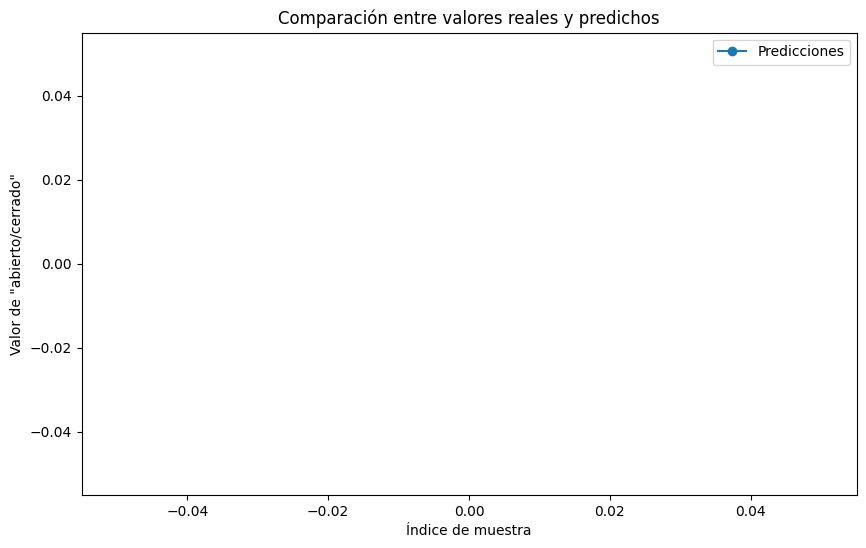

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
#plt.plot(y_test, label='Valores reales', marker='x')
plt.plot(predicciones, label='Predicciones', marker='o')
plt.title('Comparación entre valores reales y predichos')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de "abierto/cerrado"')
plt.legend()
plt.show()